In [1]:
import pandas as pd
import numpy as np
import stumpy
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, FancyArrowPatch
from matplotlib import animation
from IPython.display import HTML
import random
import helpers as hp
import time

# Acelerometro:


In [2]:
data_accel = pd.read_csv('raw/watch/accel/data_1600_accel_watch.txt',
                   header = None,names=['user','activity','timestamp','xaccel','yaccel','zaccel', 'NA'])

data_accel.drop('NA',axis=1,inplace=True)
#data.sort_values('timestamp',ascending=True,inplace=True)
#data.index = data['timestamp']
data_accel['index'] = data_accel.index.astype(int)
data_accel['zaccel'] = data_accel['zaccel'].str.replace(';','').astype(float)
data_accel['num_label'] = [hp.load_activity_map()[i][2] for i in data_accel['activity']]

In [3]:
changing_points = data_accel['num_label'][data_accel['num_label'].diff()!=0].index.values.tolist()
labels_changing_points = data_accel['activity'].value_counts().index.sort_values()
changing_points.append(data_accel.index.max())


In [4]:
changing_points.pop(0)
changing_points[-1]=65462

## Eixo X:

In [5]:
X=data_accel['xaccel'].values
changing_points[-1]=65462

Produção de todos os algoritmos:

In [6]:
a = time.time()
regime_locations_fluss = hp.Fluss(X,m=500,L=500,n_regimes=18,excl_factor=5)
b = time.time()

In [7]:
c = time.time()
regime_locations_WindomSliding = hp.WindomSliding(X,n_regimes=17,width=1000)
d = time.time()

In [8]:
e= time.time()
regime_locations_BottomUp = hp.BottomUp(X,n_regimes=17)
f = time.time()

In [9]:
g = time.time()
regime_locations_Binseg = hp.Binseg(X,n_regimes=17)
h = time.time()

In [10]:
Xerro_fluss = hp.Metrics(regime_locations_fluss,changing_points,(b-a))
Xerro_WindowSliding = hp.Metrics(regime_locations_WindomSliding,changing_points,(d-c))
Xerro_BottomUp = hp.Metrics(regime_locations_BottomUp,changing_points,(f-e))
Xerro_Binseg = hp.Metrics(regime_locations_Binseg,changing_points,(h-g))

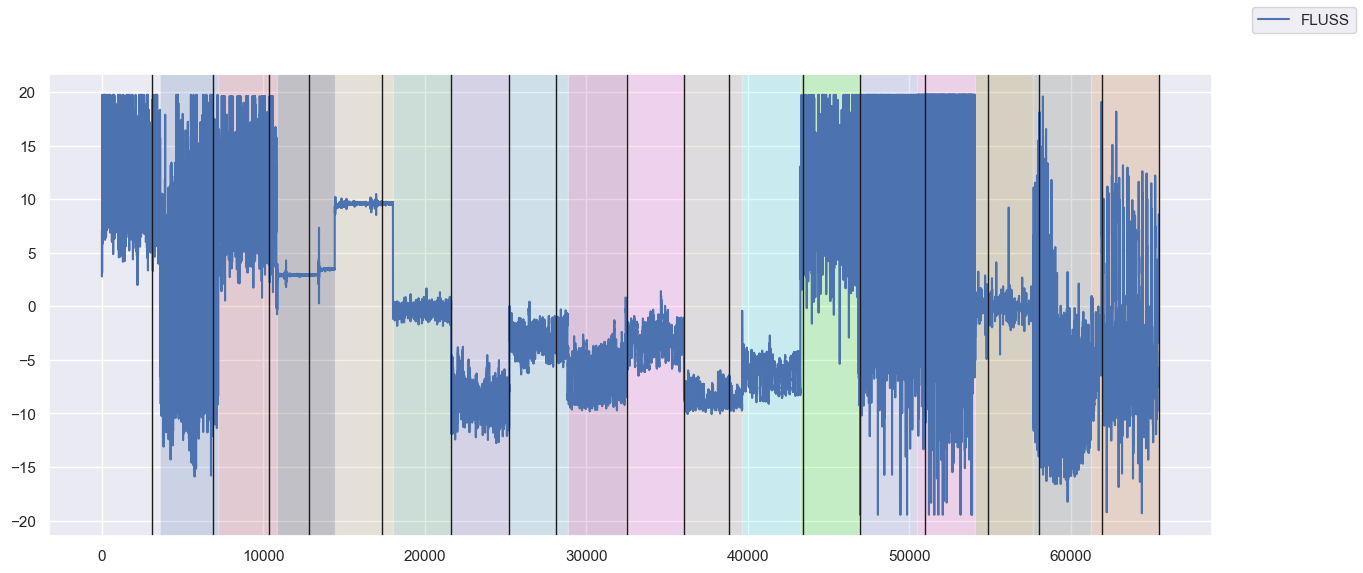

In [12]:
hp.plot(X,changing_points,labels_changing_points,regime_locations_fluss,label='FLUSS')

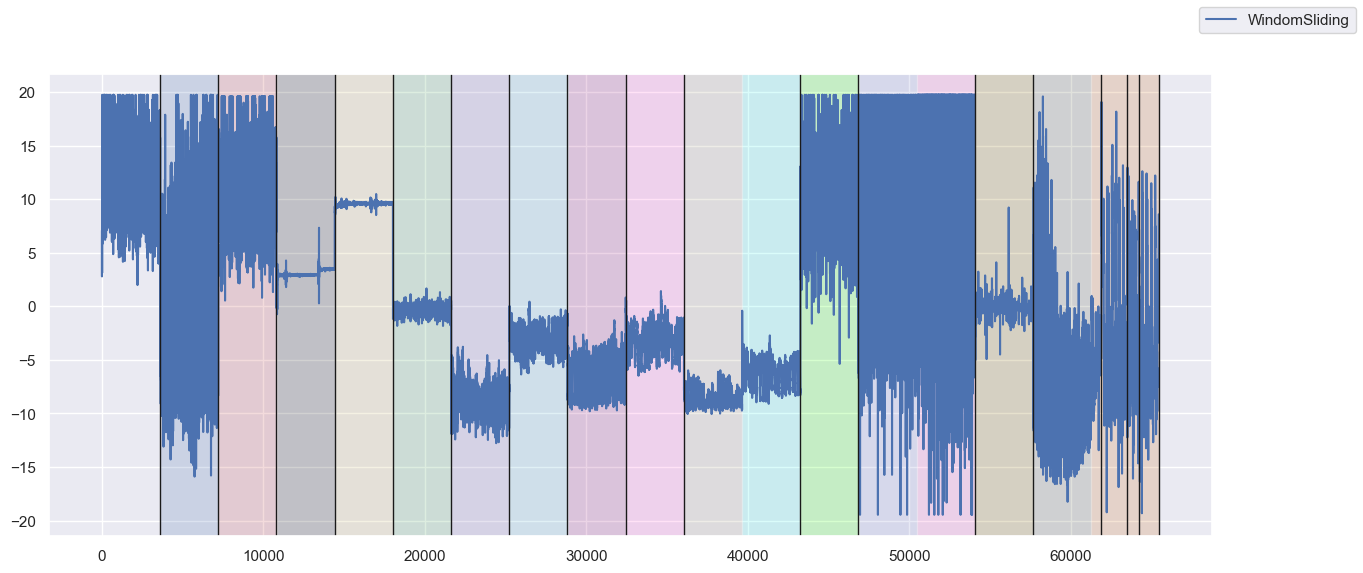

In [14]:
hp.plot(X,changing_points,labels_changing_points,regime_locations_WindomSliding,label='WindomSliding')

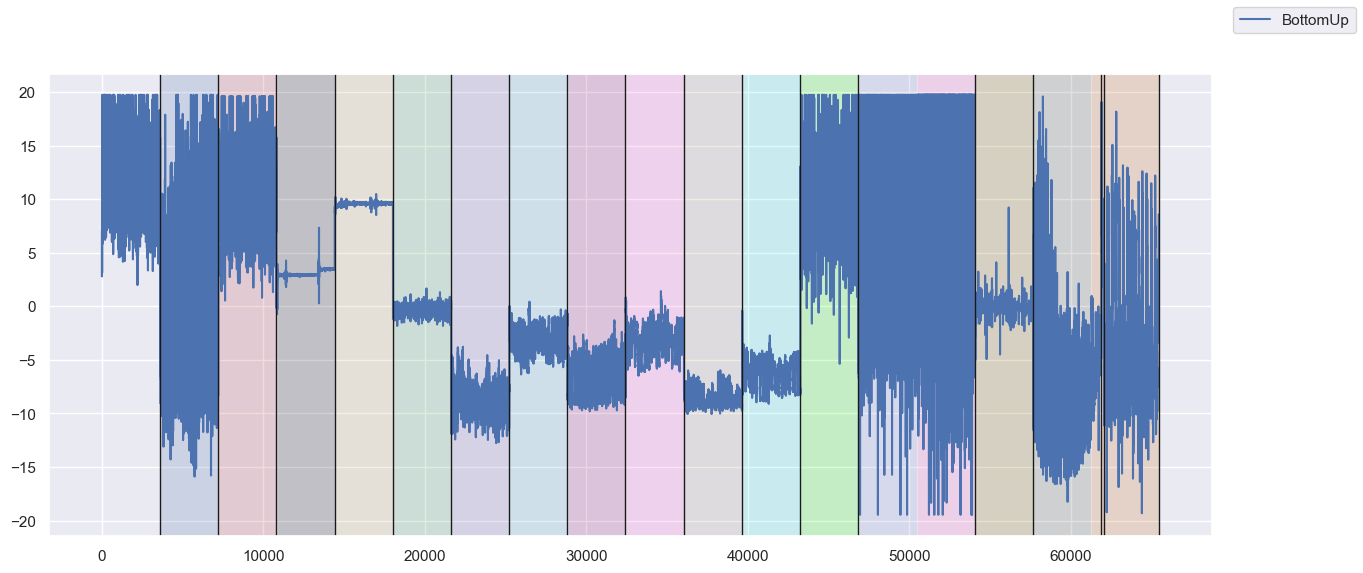

In [15]:
hp.plot(X,changing_points,labels_changing_points,regime_locations_BottomUp,label='BottomUp')

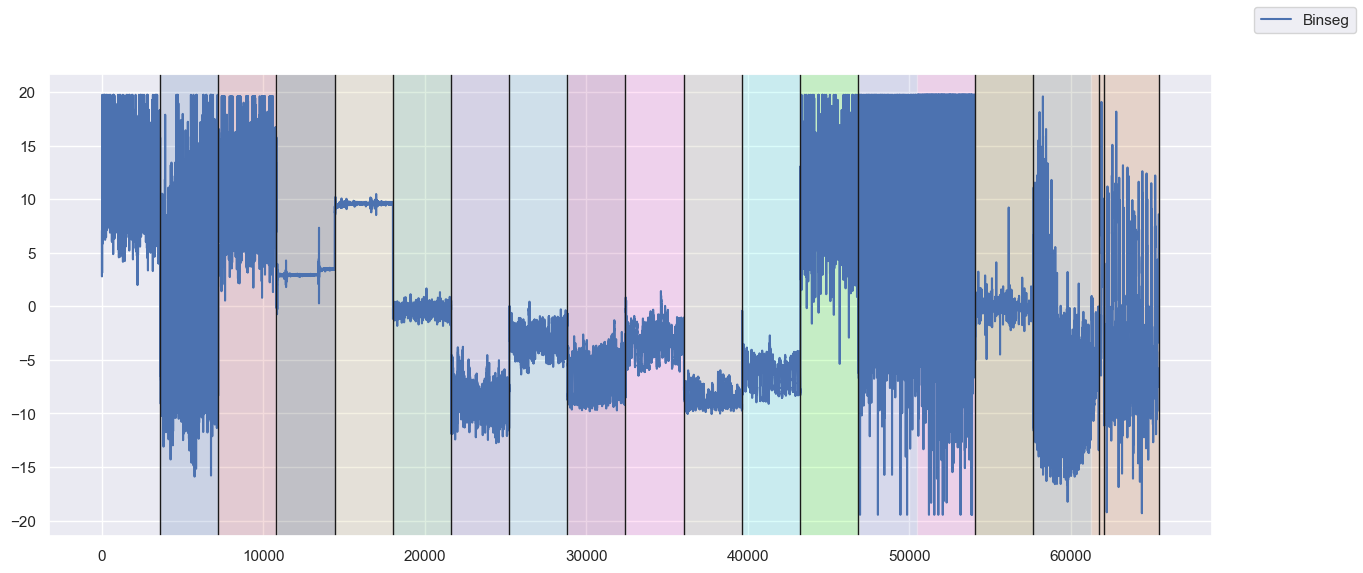

In [16]:
hp.plot(X,changing_points,labels_changing_points,regime_locations_Binseg,label='Binseg')

In [13]:
pd.DataFrame([Xerro_fluss,Xerro_WindowSliding,Xerro_BottomUp,Xerro_Binseg], 
             index = ['FLUSS','WindowSliding','BottomUp','Binseg'],
             columns = ['AnnotationError','Hausdorff', 'Precision_recall','RandIndex','Tempo de execução'])

,AnnotationError,Hausdorff,Precision_recall,RandIndex,Tempo de execução
FLUSS,0,1562.0,"[0.2353, 0.2353]",0.5438,16.933207
WindowSliding,0,3604.0,"[0.8235, 0.8235]",0.9839,0.934020
BottomUp,0,3599.0,"[0.8824, 0.8824]",0.9914,15.550681
Binseg,0,3604.0,"[0.8824, 0.8824]",0.9916,5.843469


## Eixo Y:

In [17]:
X=data_accel['yaccel'].values

In [18]:
a = time.time()
regime_locations_fluss = hp.Fluss(X,m=500,L=500,n_regimes=18,excl_factor=5)
b = time.time()

In [19]:
c = time.time()
regime_locations_WindomSliding = hp.WindomSliding(X,n_regimes=17,width=1000)
d = time.time()

In [20]:
e= time.time()
regime_locations_BottomUp = hp.BottomUp(X,n_regimes=17)
f = time.time()

In [21]:
g = time.time()
regime_locations_Binseg = hp.Binseg(X,n_regimes=17)
h = time.time()

In [22]:
Yerro_fluss = hp.Metrics(regime_locations_fluss,changing_points,(b-a))
Yerro_WindowSliding = hp.Metrics(regime_locations_WindomSliding,changing_points,(d-c))
Yerro_BottomUp = hp.Metrics(regime_locations_BottomUp,changing_points,(f-e))
Yerro_Binseg = hp.Metrics(regime_locations_Binseg,changing_points,(h-g))

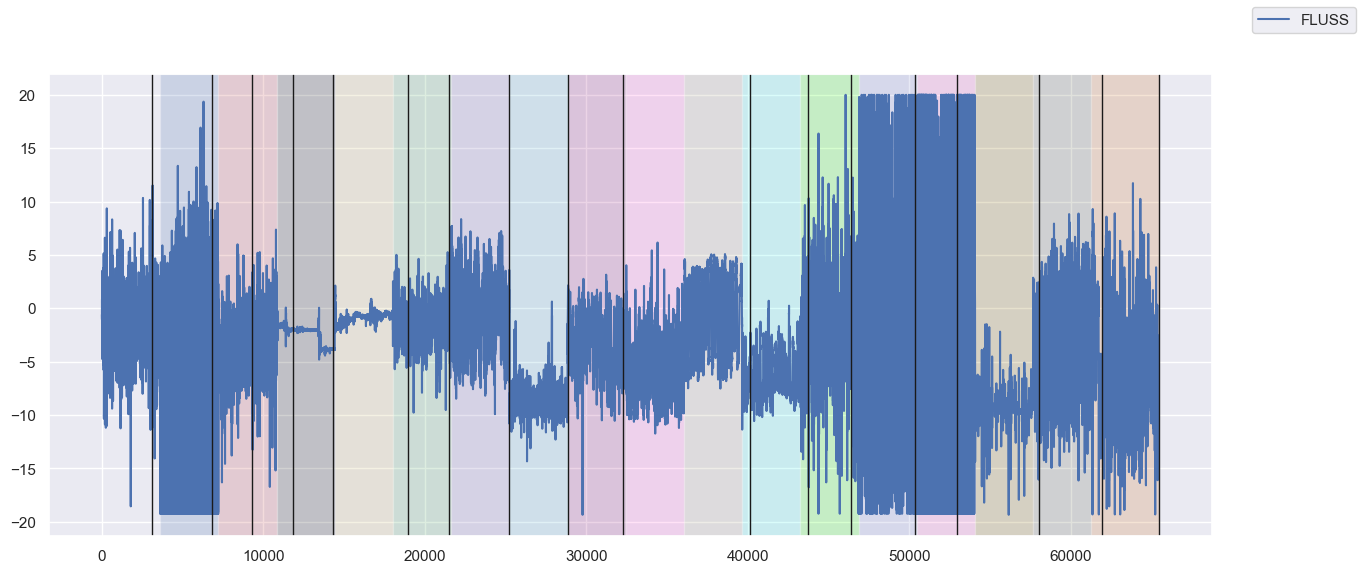

In [24]:
hp.plot(X,changing_points,labels_changing_points,regime_locations_fluss,label='FLUSS')

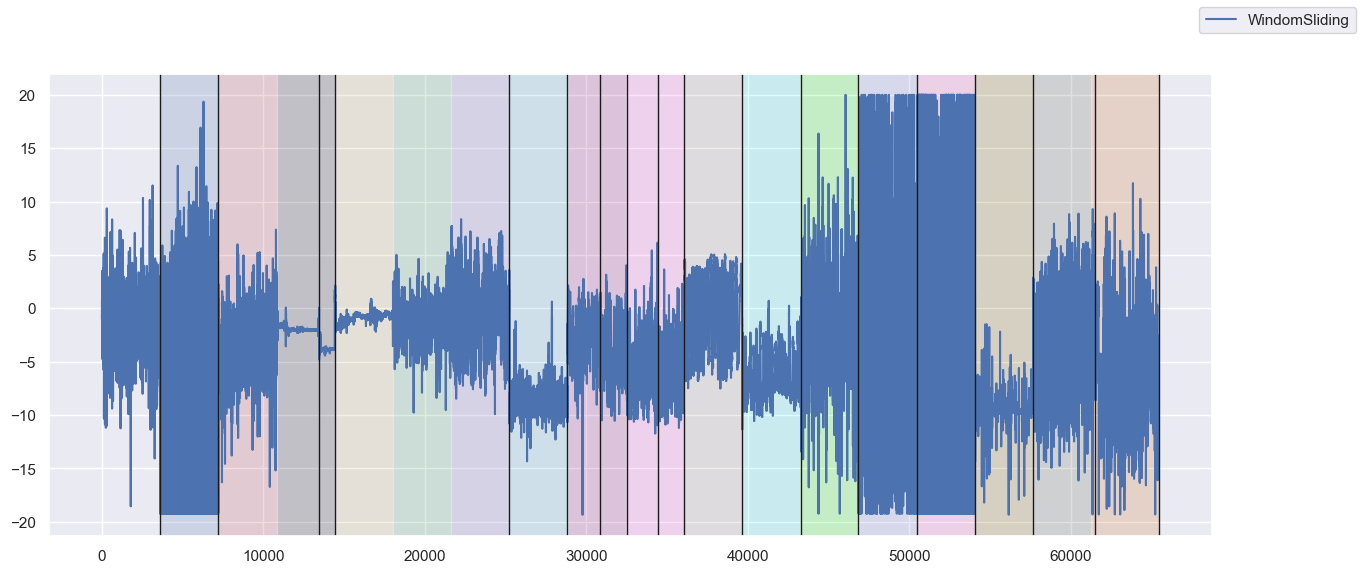

In [25]:
hp.plot(X,changing_points,labels_changing_points,regime_locations_WindomSliding,label='WindomSliding')

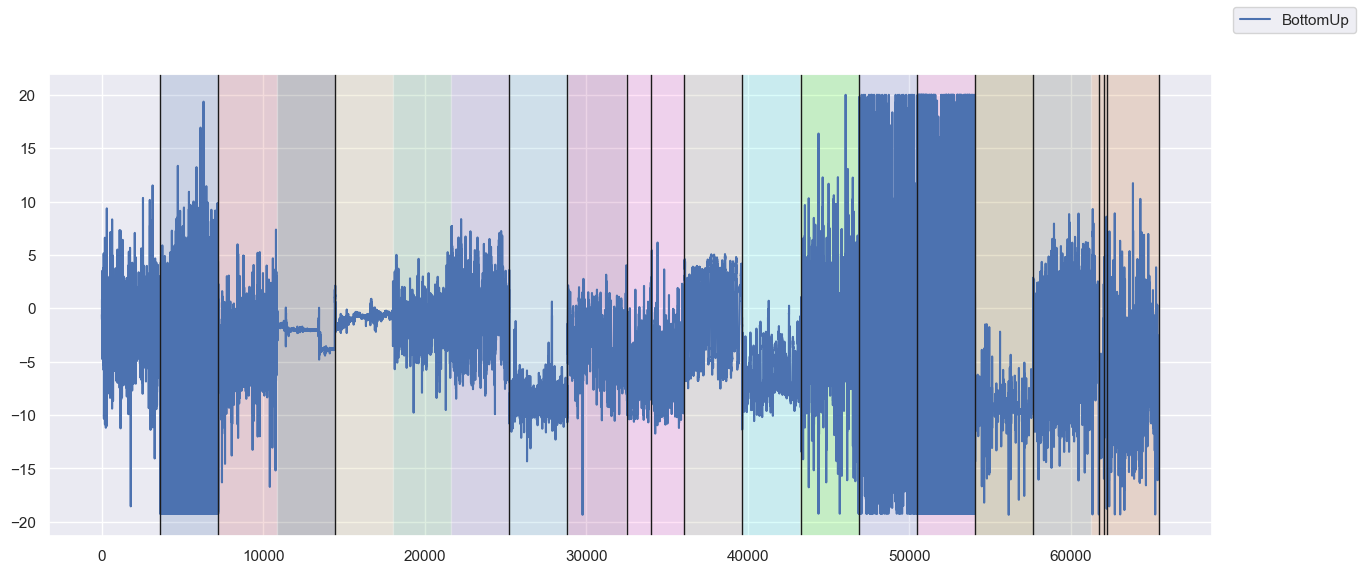

In [26]:
hp.plot(X,changing_points,labels_changing_points,regime_locations_BottomUp,label='BottomUp')

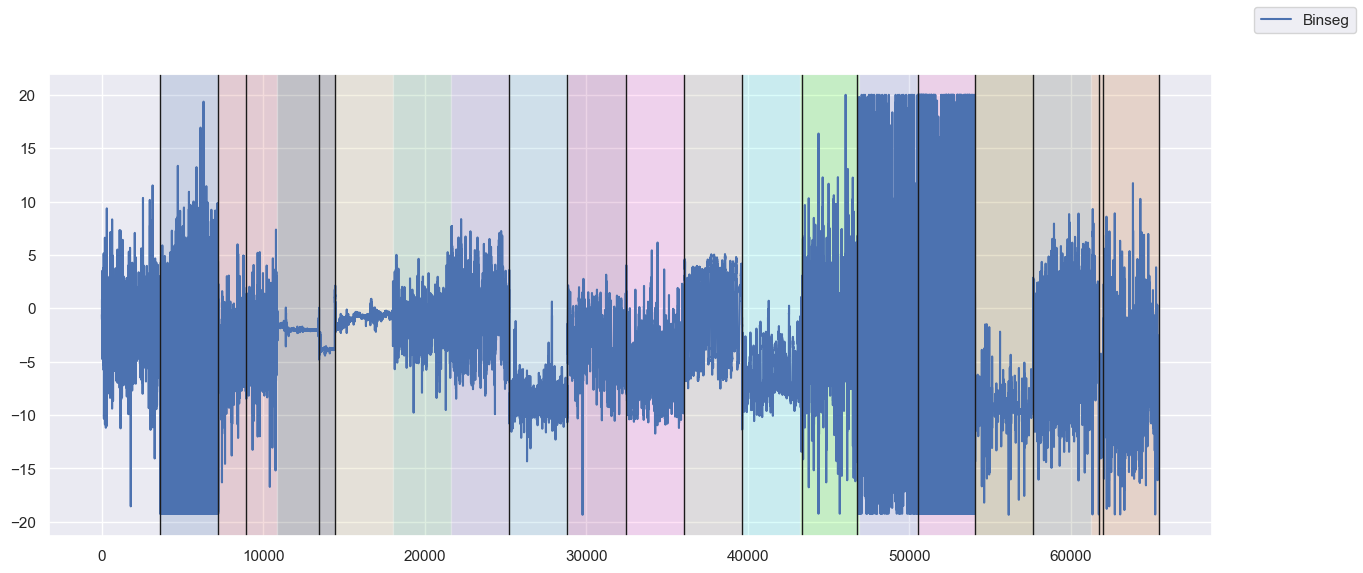

In [27]:
hp.plot(X,changing_points,labels_changing_points,regime_locations_Binseg,label='Binseg')

In [23]:
pd.DataFrame([Yerro_fluss,Yerro_WindowSliding,Yerro_BottomUp,Yerro_Binseg], 
             index = ['FLUSS','WindowSliding','BottomUp','Binseg'],
             columns = ['AnnotationError','Hausdorff', 'Precision_recall','RandIndex','Tempo de execução'])

,AnnotationError,Hausdorff,Precision_recall,RandIndex,Tempo de execução
FLUSS,0,3748.0,"[0.1765, 0.1765]",0.7261,6.641072
WindowSliding,0,3606.0,"[0.7647, 0.7647]",0.9715,1.010813
BottomUp,0,3606.0,"[0.7647, 0.7647]",0.9710,17.149956
Binseg,0,3606.0,"[0.7059, 0.7059]",0.9737,6.253878


## Eixo Z:

In [28]:
X=data_accel['zaccel'].values

In [29]:
a = time.time()
regime_locations_fluss = hp.Fluss(X,m=500,L=500,n_regimes=18,excl_factor=5)
b = time.time()

In [30]:
c = time.time()
regime_locations_WindomSliding = hp.WindomSliding(X,n_regimes=17,width=1000)
d = time.time()

In [31]:
e= time.time()
regime_locations_BottomUp = hp.BottomUp(X,n_regimes=17)
f = time.time()

In [32]:
g = time.time()
regime_locations_Binseg = hp.Binseg(X,n_regimes=17)
h = time.time()

In [33]:
Zerro_fluss = hp.Metrics(regime_locations_fluss,changing_points,(b-a))
Zerro_WindowSliding = hp.Metrics(regime_locations_WindomSliding,changing_points,(d-c))
Zerro_BottomUp = hp.Metrics(regime_locations_BottomUp,changing_points,(f-e))
Zerro_Binseg = hp.Metrics(regime_locations_Binseg,changing_points,(h-g))

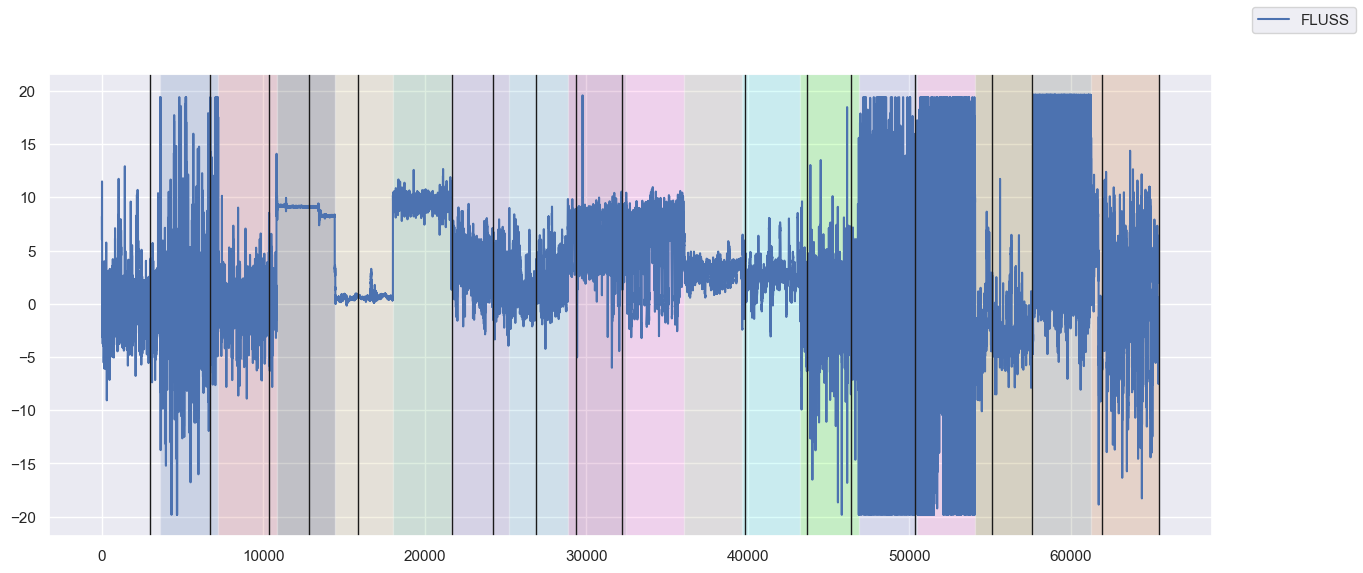

In [35]:
hp.plot(X,changing_points,labels_changing_points,regime_locations_fluss,label='FLUSS')

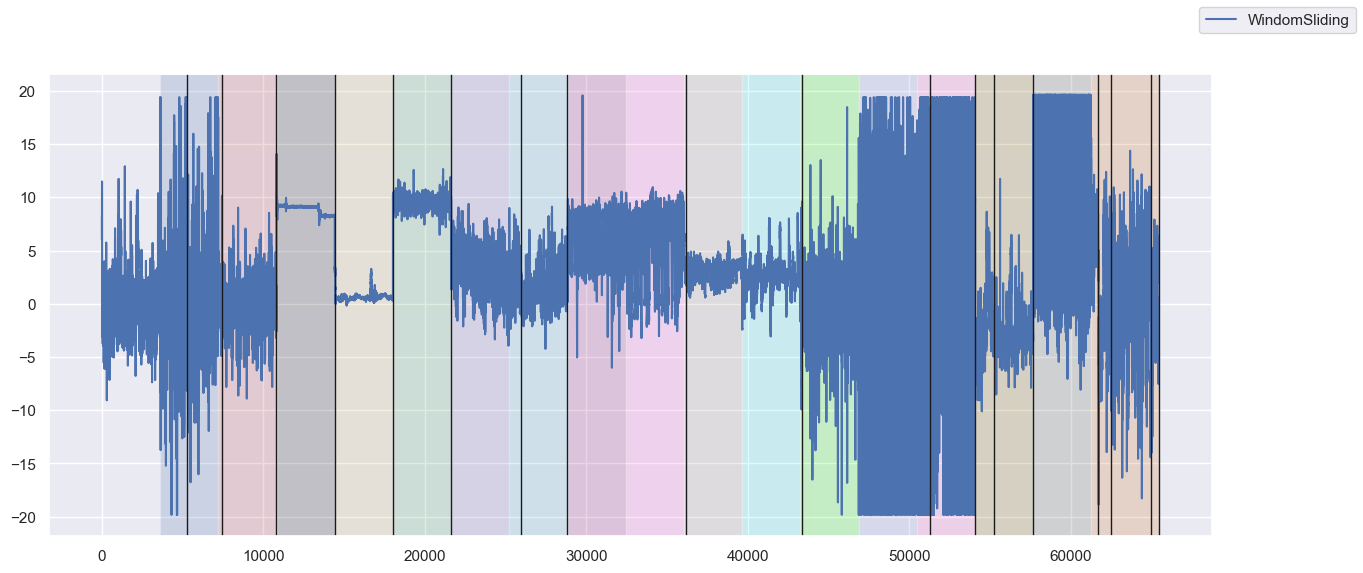

In [36]:
hp.plot(X,changing_points,labels_changing_points,regime_locations_WindomSliding,label='WindomSliding')

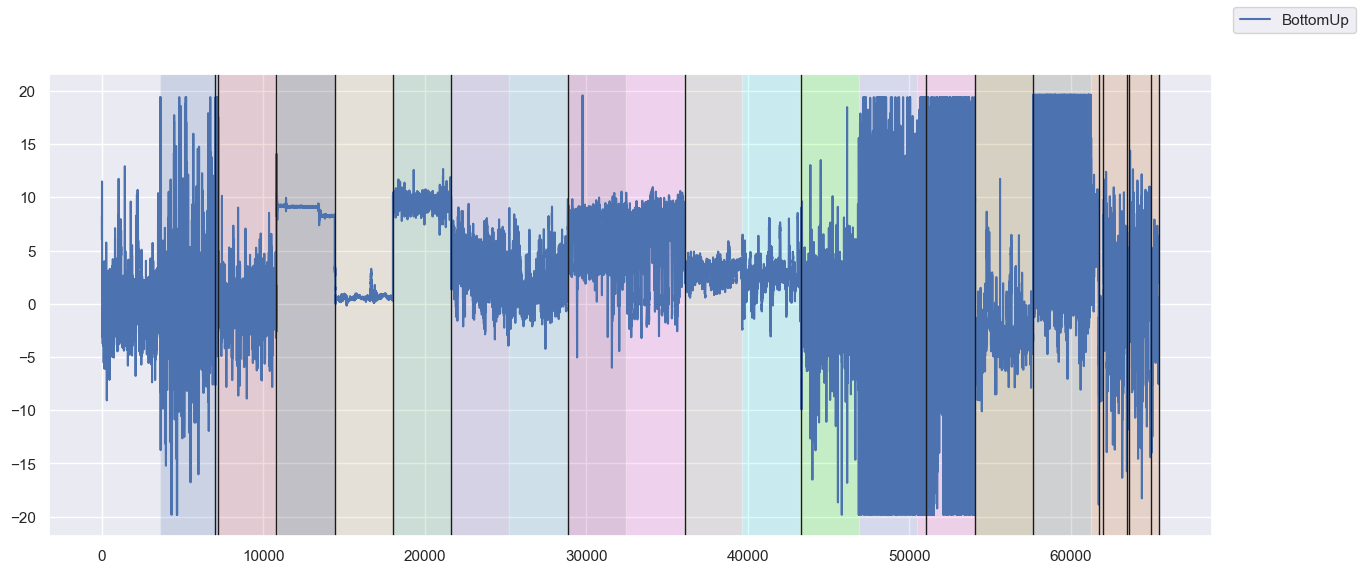

In [37]:
hp.plot(X,changing_points,labels_changing_points,regime_locations_BottomUp,label='BottomUp')

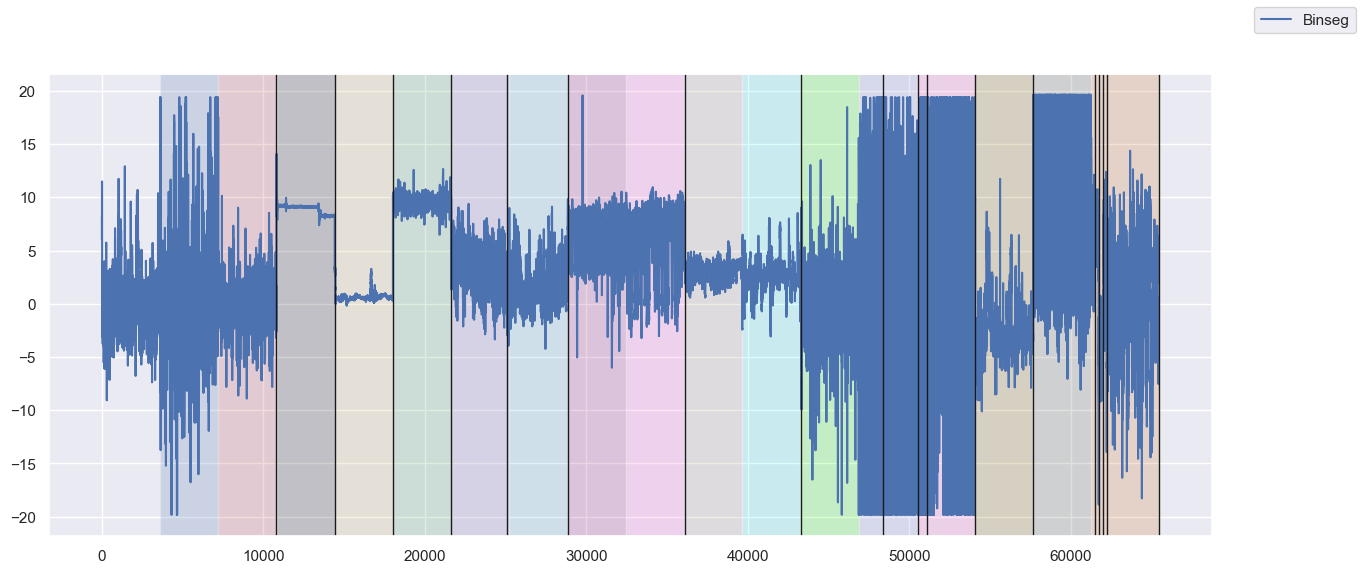

In [38]:
hp.plot(X,changing_points,labels_changing_points,regime_locations_Binseg,label='Binseg')

In [34]:
pd.DataFrame([Zerro_fluss,Zerro_WindowSliding,Zerro_BottomUp,Zerro_Binseg], 
             index = ['FLUSS','WindowSliding','BottomUp','Binseg'],
             columns = ['AnnotationError','Hausdorff', 'Precision_recall','RandIndex','Tempo de execução'])

,AnnotationError,Hausdorff,Precision_recall,RandIndex,Tempo de execução
FLUSS,0,3757.0,"[0.1765, 0.1765]",0.4256,6.526269
WindowSliding,0,3669.0,"[0.4118, 0.4118]",0.9655,0.936015
BottomUp,0,3669.0,"[0.5882, 0.5882]",0.9626,18.122317
Binseg,0,7210.0,"[0.5882, 0.5882]",0.9618,6.304252


# Giroscópio

In [39]:
data_gyro = pd.read_csv('raw/watch/gyro/data_1600_gyro_watch.txt',
                   header = None,names=['user','activity','timestamp','xaccel','yaccel','zaccel', 'NA'])
data_gyro.drop('NA',axis=1,inplace=True)
#data.sort_values('timestamp',ascending=True,inplace=True)
#data.index = data['timestamp']
data_gyro['index'] = data_gyro.index.astype(int)
data_gyro['zaccel'] = data_gyro['zaccel'].str.replace(';','').astype(float)
data_gyro['num_label'] = [hp.load_activity_map()[i][2] for i in data_gyro['activity']]


In [40]:
changing_points = data_accel['num_label'][data_accel['num_label'].diff()!=0].index.values.tolist()
labels_changing_points = data_accel['activity'].value_counts().index.sort_values()
changing_points.append(data_accel.index.max())
changing_points.pop(0)
changing_points[-1]=65435

## Eixo X

In [54]:
X=data_gyro['xaccel'].values

In [55]:
a = time.time()
regime_locations_fluss = hp.Fluss(X,m=500,L=500,n_regimes=18,excl_factor=5)
regime_locations_fluss[-1]=65435
b = time.time()

In [56]:
c = time.time()
regime_locations_WindomSliding = hp.WindomSliding(X,n_regimes=17,width=1000)
d = time.time()

In [57]:
e= time.time()
regime_locations_BottomUp = hp.BottomUp(X,n_regimes=17)
f = time.time()

In [58]:
g = time.time()
regime_locations_Binseg = hp.Binseg(X,n_regimes=17)
h = time.time()

In [59]:
Xgerro_fluss = hp.Metrics(regime_locations_fluss,changing_points,(b-a))
Xgerro_WindowSliding = hp.Metrics(regime_locations_WindomSliding,changing_points,(d-c))
Xgerro_BottomUp = hp.Metrics(regime_locations_BottomUp,changing_points,(f-e))
Xgerro_Binseg = hp.Metrics(regime_locations_Binseg,changing_points,(h-e))

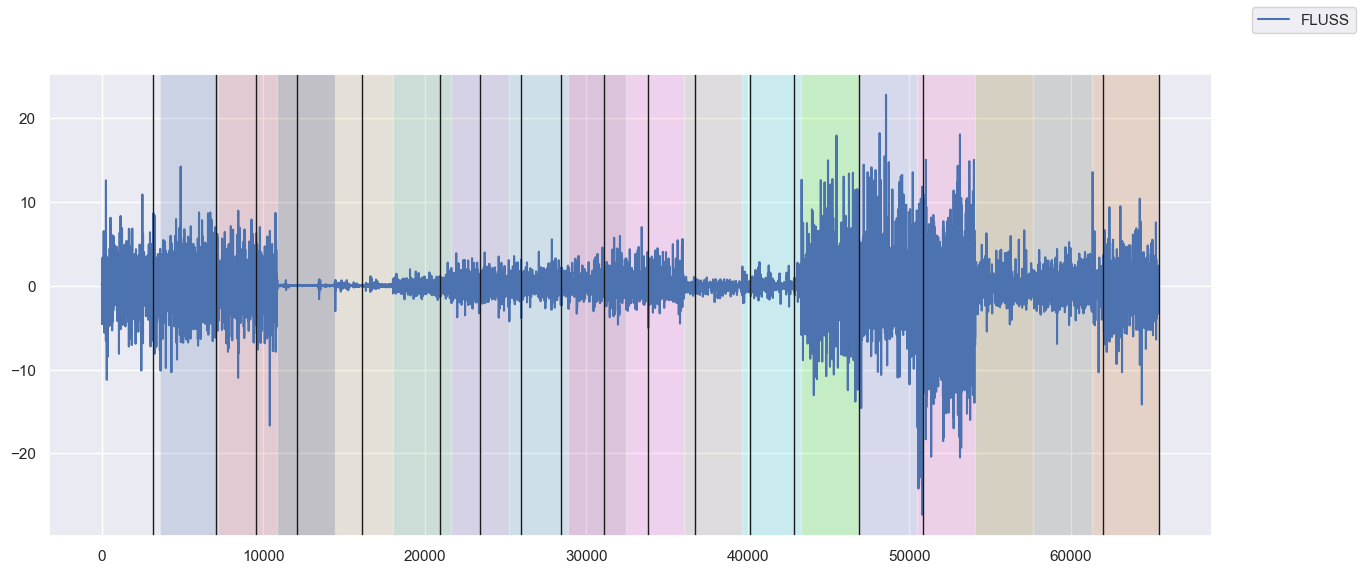

In [60]:
hp.plot(X,changing_points,labels_changing_points,regime_locations_fluss,label='FLUSS')

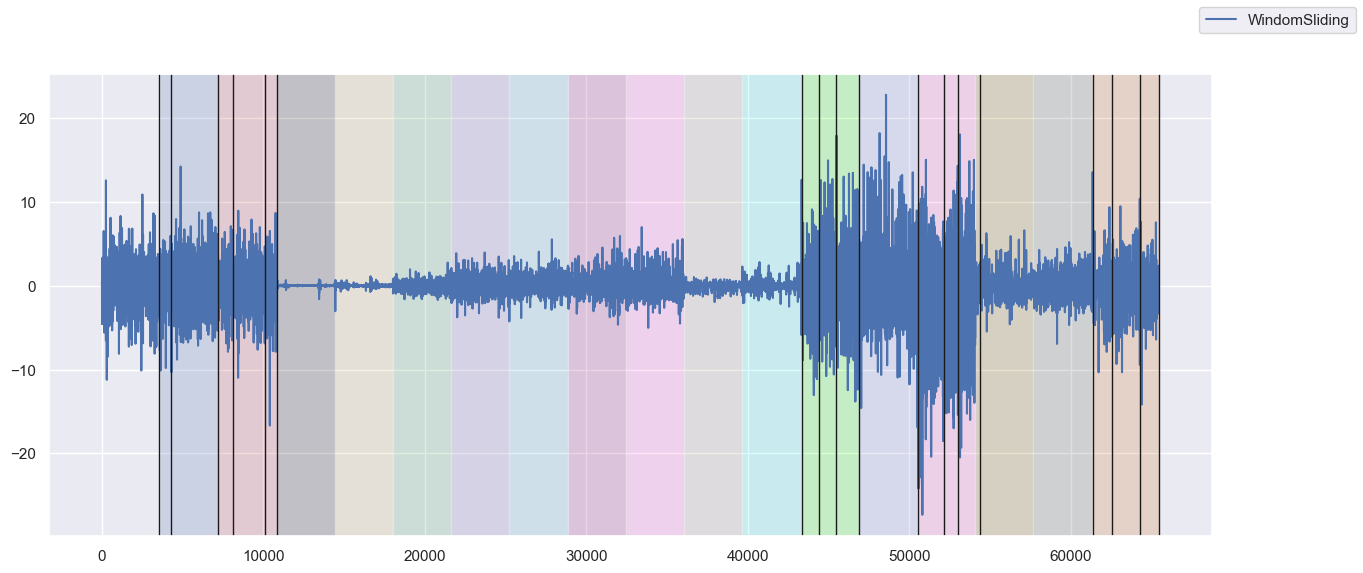

In [61]:
hp.plot(X,changing_points,labels_changing_points,regime_locations_WindomSliding,label='WindomSliding')

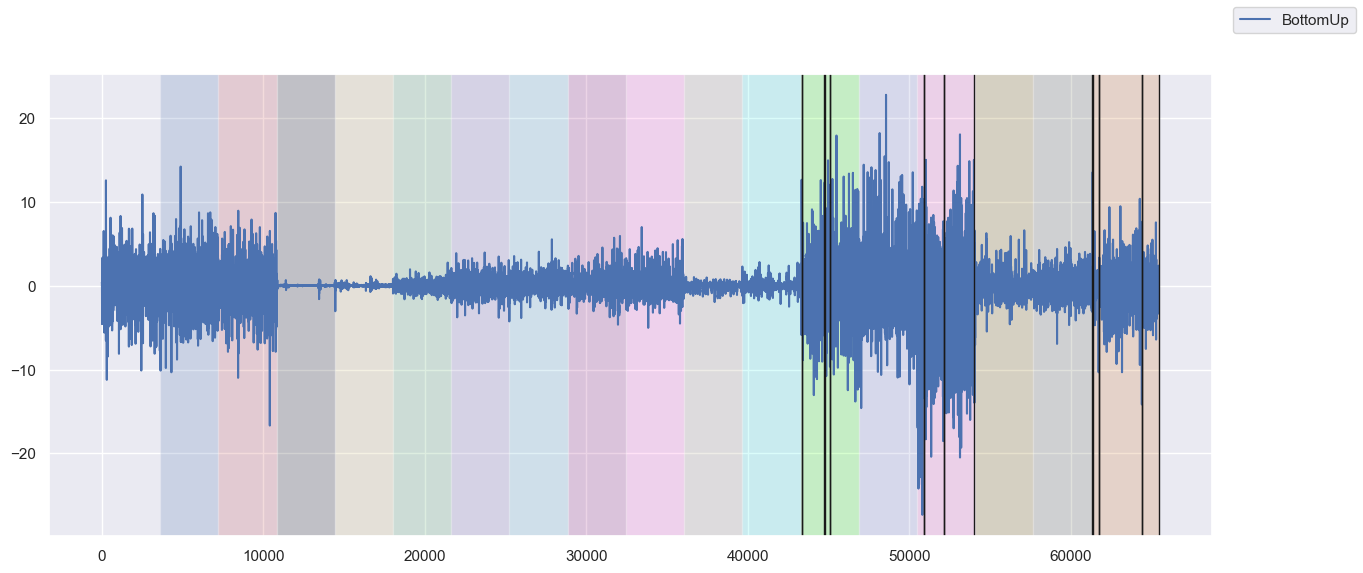

In [62]:
hp.plot(X,changing_points,labels_changing_points,regime_locations_BottomUp,label='BottomUp')

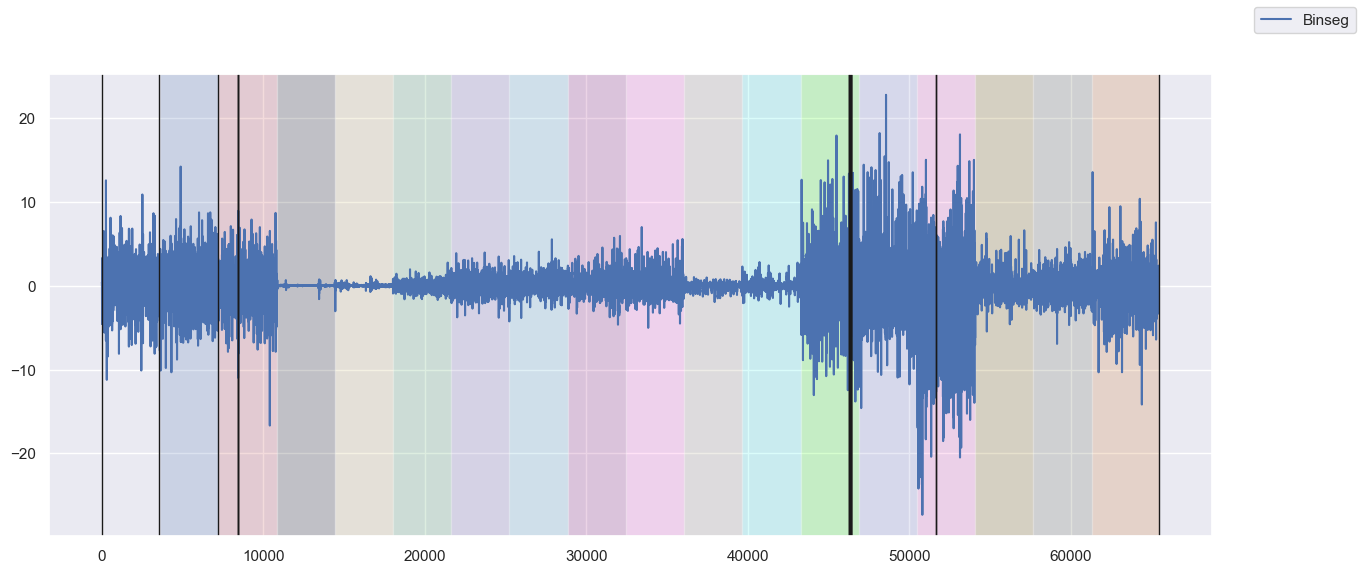

In [63]:
hp.plot(X,changing_points,labels_changing_points,regime_locations_Binseg,label='Binseg')

In [64]:
pd.DataFrame([Xgerro_fluss,Xgerro_WindowSliding,Xgerro_BottomUp,Xgerro_Binseg], 
             index = ['FLUSS','WindowSliding','BottomUp','Binseg'],
             columns = ['AnnotationError','Hausdorff', 'Precision_recall','RandIndex','Tempo de execução'])

,AnnotationError,Hausdorff,Precision_recall,RandIndex,Tempo de execução
FLUSS,0,4316.0,"[0.0588, 0.0588]",0.4461,6.798123
WindowSliding,0,14480.0,"[0.4118, 0.4118]",0.7649,0.988396
BottomUp,0,39715.0,"[0.1765, 0.1765]",0.5818,19.020493
Binseg,0,17410.0,"[0.1176, 0.1176]",0.6570,26.499107


## Eixo Y

In [47]:
X=data_gyro['yaccel'].values

In [48]:
a = time.time()
regime_locations_fluss = hp.Fluss(X,m=500,L=500,n_regimes=18,excl_factor=5)
regime_locations_fluss[-1]=65435
b = time.time()

In [49]:
c = time.time()
regime_locations_WindomSliding = hp.WindomSliding(X,n_regimes=17,width=1000)
d = time.time()

In [50]:
e= time.time()
regime_locations_BottomUp = hp.BottomUp(X,n_regimes=17)
f = time.time()

In [51]:
g = time.time()
regime_locations_Binseg = hp.Binseg(X,n_regimes=17)
h = time.time()

In [56]:
changing_points[-1]=65435
regime_locations_fluss[-1]=65435
Ygerro_fluss = hp.Metrics(regime_locations_fluss,changing_points,(b-a))
Ygerro_WindowSliding = hp.Metrics(regime_locations_WindomSliding,changing_points,(d-c))
Ygerro_BottomUp = hp.Metrics(regime_locations_BottomUp,changing_points,(f-e))
Ygerro_Binseg = hp.Metrics(regime_locations_Binseg,changing_points,(h-e))

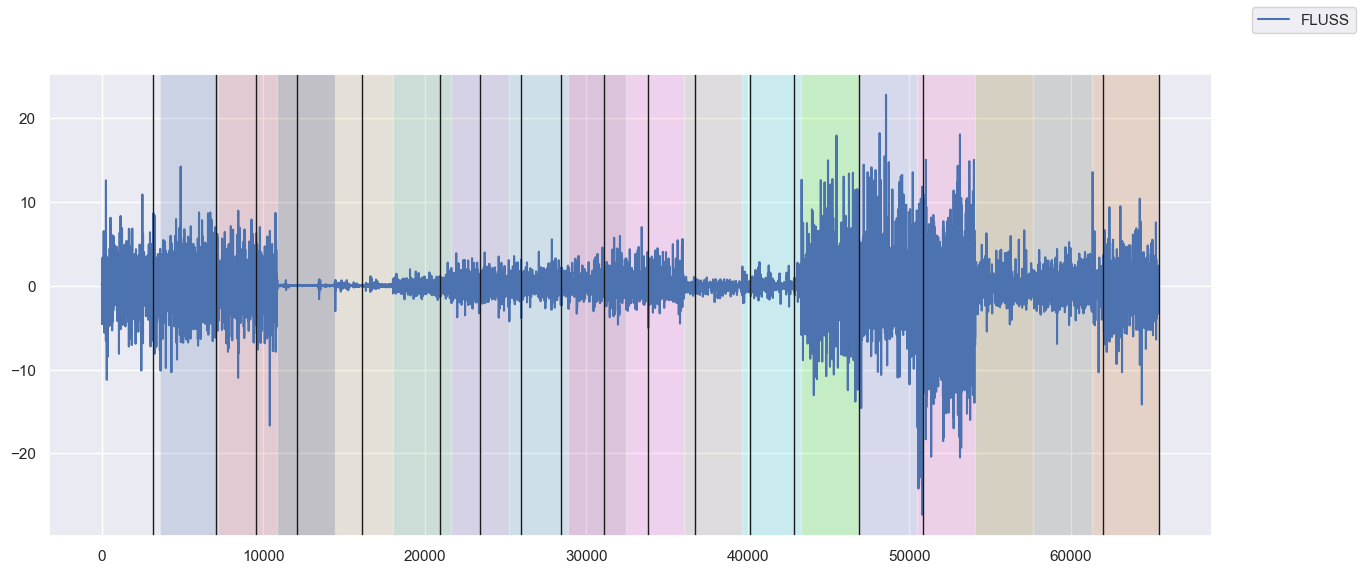

In [50]:
hp.plot(X,changing_points,labels_changing_points,regime_locations_fluss,label='FLUSS')

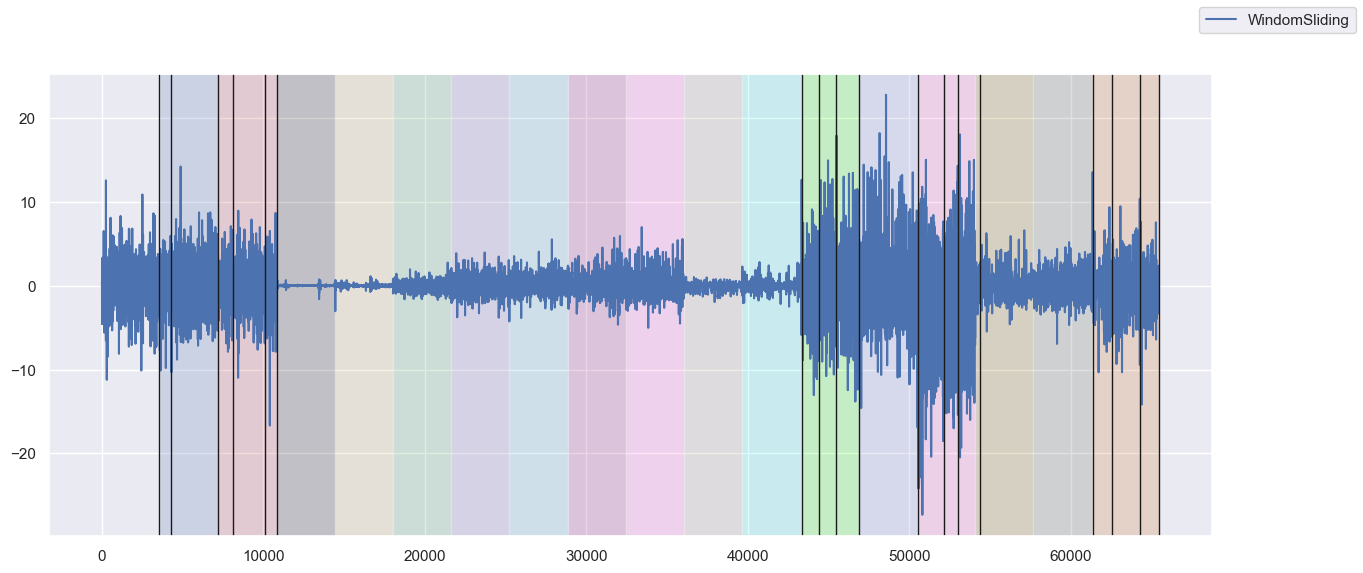

In [51]:
hp.plot(X,changing_points,labels_changing_points,regime_locations_WindomSliding,label='WindomSliding')

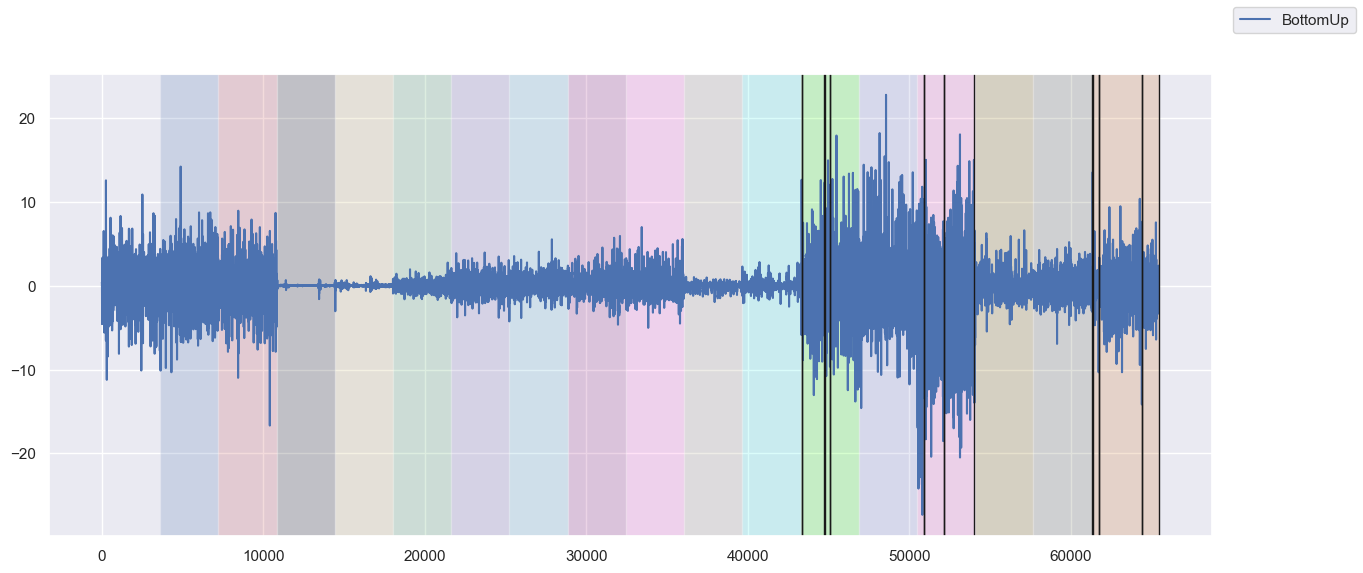

In [52]:
hp.plot(X,changing_points,labels_changing_points,regime_locations_BottomUp,label='BottomUp')

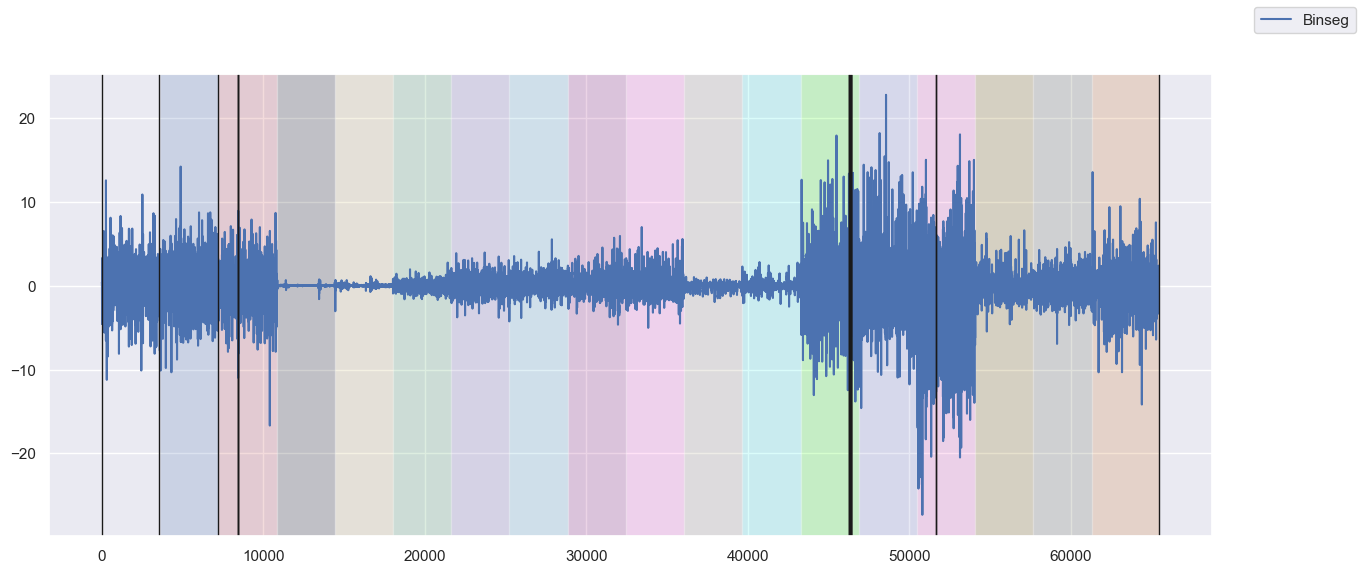

In [53]:
hp.plot(X,changing_points,labels_changing_points,regime_locations_Binseg,label='Binseg')

In [57]:
pd.DataFrame([Ygerro_fluss,Ygerro_WindowSliding,Ygerro_BottomUp,Ygerro_Binseg], 
             index = ['FLUSS','WindowSliding','BottomUp','Binseg'],
             columns = ['AnnotationError','Hausdorff', 'Precision_recall','RandIndex','Tempo de execução'])

,AnnotationError,Hausdorff,Precision_recall,RandIndex,Tempo de execução
FLUSS,0,3126.0,"[0.0588, 0.0588]",0.5586,6.020891
WindowSliding,0,15025.0,"[0.2353, 0.2353]",0.7472,0.970403
BottomUp,0,44465.0,"[0.0, 0.0]",0.4573,16.015151
Binseg,0,46835.0,"[0.1765, 0.1765]",0.4406,21.896416


## Eixo Z

In [65]:
X=data_gyro['zaccel'].values

In [66]:
a = time.time()
regime_locations_fluss = hp.Fluss(X,m=500,L=500,n_regimes=18,excl_factor=5)
regime_locations_fluss[-1]=65435
b = time.time()

In [67]:
c = time.time()
regime_locations_WindomSliding = hp.WindomSliding(X,n_regimes=17,width=1000)
d = time.time()

In [68]:
e= time.time()
regime_locations_BottomUp = hp.BottomUp(X,n_regimes=17)
f = time.time()

In [69]:
g = time.time()
regime_locations_Binseg = hp.Binseg(X,n_regimes=17)
h = time.time()

In [70]:
changing_points[-1]=65435
regime_locations_fluss[-1]=65435
Zgerro_fluss = hp.Metrics(regime_locations_fluss,changing_points,(b-a))
Zgerro_WindowSliding = hp.Metrics(regime_locations_WindomSliding,changing_points,(d-c))
Zgerro_BottomUp = hp.Metrics(regime_locations_BottomUp,changing_points,(f-e))
Zgerro_Binseg = hp.Metrics(regime_locations_Binseg,changing_points,(h-e))

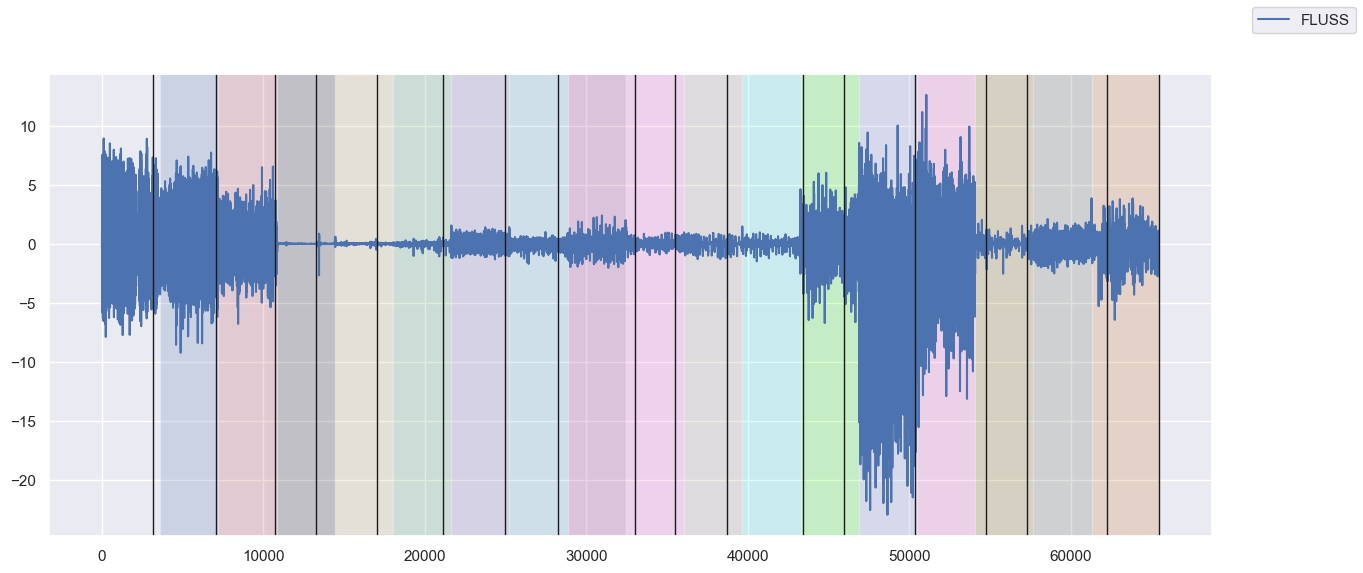

In [71]:
hp.plot(X,changing_points,labels_changing_points,regime_locations_fluss,label='FLUSS')

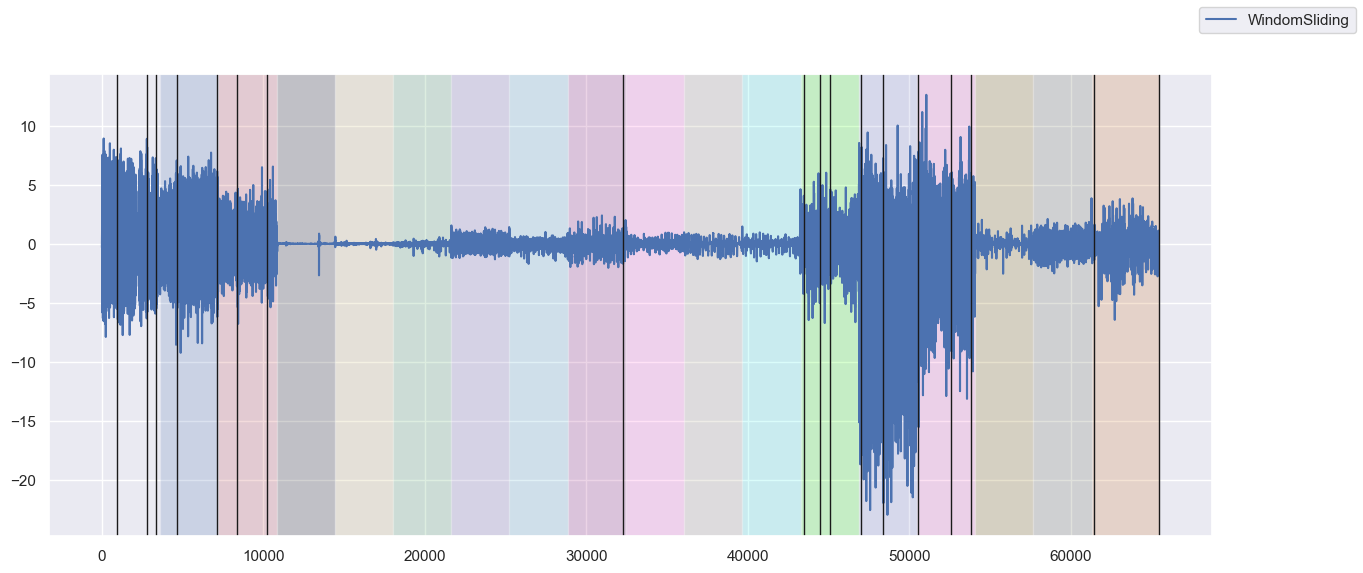

In [72]:
hp.plot(X,changing_points,labels_changing_points,regime_locations_WindomSliding,label='WindomSliding')

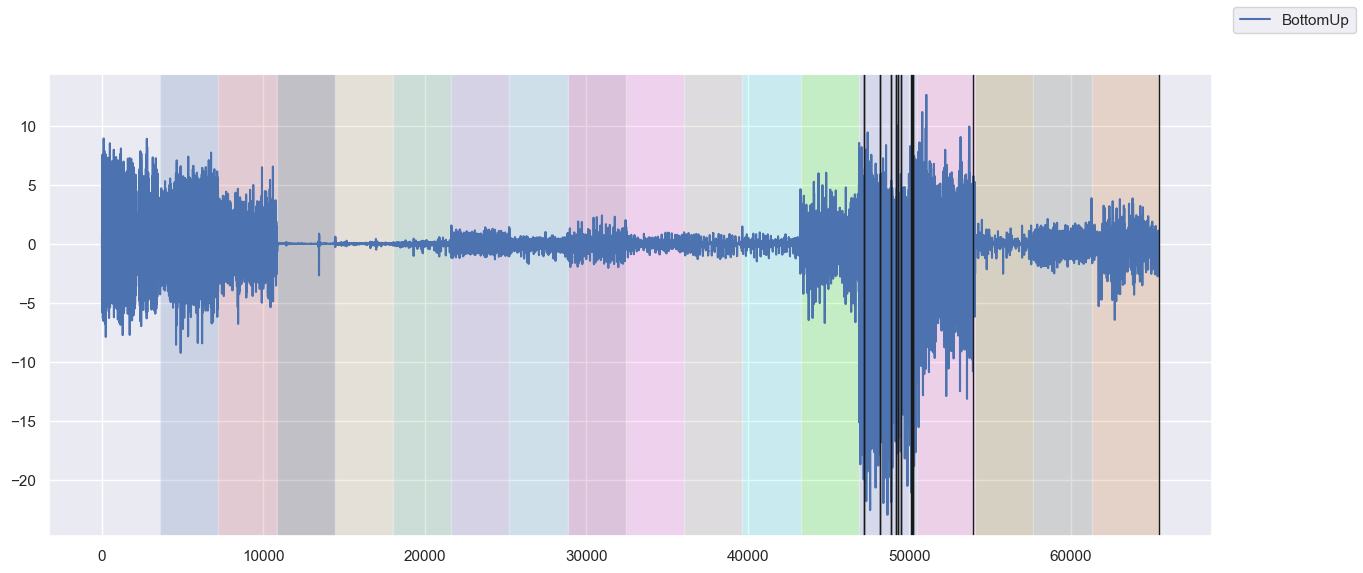

In [73]:
hp.plot(X,changing_points,labels_changing_points,regime_locations_BottomUp,label='BottomUp')

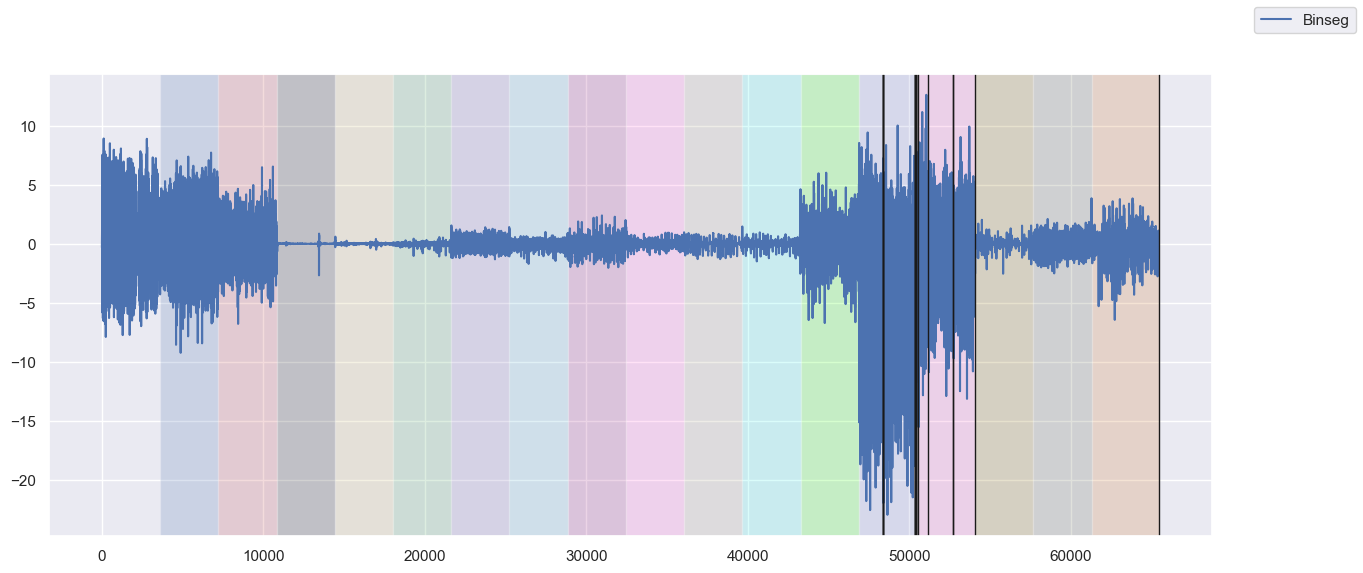

In [74]:
hp.plot(X,changing_points,labels_changing_points,regime_locations_Binseg,label='Binseg')

In [75]:
pd.DataFrame([Zgerro_fluss,Zgerro_WindowSliding,Zgerro_BottomUp,Zgerro_Binseg], 
             index = ['FLUSS','WindowSliding','BottomUp','Binseg'],
             columns = ['AnnotationError','Hausdorff', 'Precision_recall','RandIndex','Tempo de execução'])

,AnnotationError,Hausdorff,Precision_recall,RandIndex,Tempo de execução
FLUSS,0,1194.0,"[0.0588, 0.0588]",0.7239,6.761274
WindowSliding,0,10649.0,"[0.1176, 0.1176]",0.8657,0.965932
BottomUp,0,43560.0,"[0.0, 0.0]",0.4959,17.813262
Binseg,0,44745.0,"[0.1176, 0.1176]",0.4702,24.650728
